#Teste $ZCalc$ para Média Populacional



É necessário garantir que a amostra é normal.

Além disso, o Zcalc será usado para apenas 1 amostra por vez.


Devemos definir a hipótese a ser testada sobre o parâmetro 𝜇 (média populacional) dessa amostra, que é chamada de hipótese nula:

(a média da população é equivalente)
$$H_0 : 𝜇 = 𝜇_{0}$$

Definiremos também a hipótese alternativa $(H_1)$ - a média divergiu:

(a média da população não é equivalente)
$$H_1 : 𝜇 \not= 𝜇_{0}$$


A Zcalc (distribuição amostral das médias) é dado por:

$$Zcalc = \frac{\bar{X} - 𝜇_{0}}{\sigma_{\bar{X}}}~~com~~distribuição~~ N_{(0,1)}$$

O teste Z pode ser usado em dois casos:

1. Quando o desvio padrão populacional ($\sigma$) é conhecido _e_ a amostra é < 30.

1. Quando o desvio padrão populacional ($\sigma$) não é conhecido _e_ a amostra é > 30.

Para cada tipo, há sua regra de decisão:

Regra de Decisão:



**1. Unilateral**
*  Esquerda
    
    (a hipotese é rejeitada se Zcalc for maior que -Zc)

    $Zcalc < -Z_{critico},$ rejeitamos $H_{0}$

    (caso contrário)

    aceitamos $H_{0}$


*  Direita
    
    (a hipotese é rejeitada se Zcalc for menor que Zc)

    $Z_{critico} < Zcalc$ rejeitamos $H_{0}$

    (caso contrário)

    aceitamos $H_{0}$

**2. Bilateral**

* :
    (a hipotese é rejeitada se Zcalc pertencer a região critíca)

    $-Z_{critico} < Zcalc < Z_{critico},$ rejeitamos $H_{0}$

    (caso contrário)

    aceitamos $H_{0}$



Sendo:

$\bar{X} = $ média amostral

$\sigma_{\bar{X}} = $ desvio padrão

$$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$$

$n = $ tamanho da amostra

$\sigma = $ desvio padrão populacional

$𝜇 = $ média populacional encontrada

$𝜇_{0} = $ média populacional testada sob $H_{0}$

In [258]:
# @title Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import norm
import pandas as pd
import scipy.stats as stats

In [259]:
#@ o teste z

df_resultados = pd.DataFrame(columns=['Média Populacional', 'Média da Amostra', 'Zcalc', 'Região Critíca', 'Situação', 'Tipo Teste'])

def teste_z(media_amostra, media, desvio_padrao, tmh_amostra, alpha):

    global df_resultados

    #tipo teste
    if media_amostra > media:
      tipo_teste = 'Unicaudal à Direita'

    elif media_amostra < media:
      tipo_teste = 'Unicaudal à Esquerda'
    else:
      tipo_teste = 'Bicaudal'

    #zcalc
    z_sup = media_amostra - media
    desv_pad = desvio_padrao / np.sqrt(tmh_amostra)
    zcalc = z_sup / desv_pad

    #dado teste, faça critico
    if tipo_teste == 'Bicaudal':
        z_critico = stats.norm.ppf(1 - alpha / 2)
        regiao = (-z_critico, z_critico)

    elif tipo_teste == 'Unicaudal à Direita':
        z_critico = stats.norm.ppf(alpha)
        regiao = (z_critico, np.inf)

    elif tipo_teste == 'Unicaudal à Esquerda':
        z_critico = stats.norm.ppf(1- alpha)
        regiao = (-np.inf, z_critico)

    #aceita ou rejeita
    hipotese = 'pendente'

    if zcalc < regiao[0] or zcalc > regiao[1]:
      hipotese = 'H0 é rejeitada'
    else:
      hipotese = 'H0 é aceita'

    #add os valores num df
    df_resultados.loc[len(df_resultados)] = {'Média Populacional': media,
                                             'Média da Amostra': media_amostra,
                                             'Zcalc': zcalc,
                                             'Região Critíca': regiao,
                                             'Situação': hipotese,
                                             'Tipo Teste': tipo_teste}

    return zcalc, regiao

In [260]:
#@title testando normalidade

class teste_norm():
  #teste de ks apresentado anteriormente
  def analisar_amostra(self, limite_inferior, limite_superior, tamanho_amostra, amostra):
      df = pd.Series(amostra).value_counts().reset_index()
      #valor e freq abs
      df.columns = ['X_i', 'F_abs']
      df = df.sort_values(by='X_i').reset_index(drop=True)

      #frequência acumulada
      df['F_ac'] = df['F_abs'].cumsum()
      #frequência relativa
      df['F_r'] = df['F_abs'] / tamanho_amostra
      #frequência acumulada observada
      df['F_obs'] = df['F_r'].cumsum()

      media = np.mean(amostra)
      desvio = np.std(amostra)

      df['Z-score'] = (df['X_i'] - media) / desvio
      df['F_esp'] = norm.cdf(df['Z-score'])
      df['|F_esp(X_i)-F_obs(X_i)|'] = abs(df['F_esp'] - df['F_obs'])
      df['|F_esp(X_i)-F_obs(X_{i-1})|'] = abs(df['F_esp'] - df['F_obs'].shift(fill_value=0))

      max_Fesp_Fobs = df['|F_esp(X_i)-F_obs(X_i)|'].max()
      max_Fesp_Fobs1 = df['|F_esp(X_i)-F_obs(X_{i-1})|'].max()
      listaMax = [max_Fesp_Fobs, max_Fesp_Fobs1]

      Dcalc = np.max(listaMax)
      Dc = 1.36 / np.sqrt(tamanho_amostra)

      if Dcalc < Dc:
          hipotese = "Aceita. A distribuição é normal"
      else:
          hipotese = "Rejeitada. A distribuição é não-normal"

      return {
          'Dcalc': Dcalc,
          'Dc': Dc,
          'hipotese': hipotese,
          'amostra': amostra
      }

  def plotagem(self, amostra):
    sns.set(style="whitegrid")

    fig, ax1 = plt.subplots(1, 1, figsize=(7,4))
    sns.histplot(amostra, bins='auto', kde=True, ax=ax1)
    ax1.set_title(f"Verificando Normalidade")

    #usando ks
    analise = self.analisar_amostra(0, 10, len(amostra), amostra)

    #texto lateral
    ax1.text(1.05, 0.6, f"Pelo teste de Komogorov-Sminorff:\n", fontsize=10, transform=ax1.transAxes)
    ax1.text(1.05, 0.5, f"Hipótese: {analise['hipotese']}\n", fontsize=10, transform=ax1.transAxes, color='green' if analise['hipotese'].startswith('Aceita') else 'red')
    ax1.text(1.05, 0.4, f"Dcalc: {analise['Dcalc']:.2f}\nDc: {analise['Dc']:.2f}", fontsize=10, transform=ax1.transAxes)


    plt.tight_layout()
    plt.show()


##O problema dos CRA's

Supondo que o laboratório de pesquisa Kadrit Lab está tentando verificar se os CRA's dos alunos que o compõe mantém a mesma média que foi verificada no último ano. A média calculada no último ano foi 8 (*média populacional* ).

Os pesquisadores ressaltam que há um desvio padrão de 1 (*desvio padrão* ) que acontece naturalmente devido a mudança das disciplinas
cursadas pelos alunos do laboratório.

Para verificar se a média dos CRA's se mantém, as notas de 15 alunos forão coletadas (*tamanho da amostra* ), admitindo-se um nível de
significância de 5%.

In [261]:
media = 8
desvio_padrao = 1
tmh_amostra = 15

cra_s = np.random.normal(loc=media, scale=desvio_padrao, size=tmh_amostra)

#média dos novos cra's
media_cra = np.mean(cra_s)

#significancia
alpha = 0.05

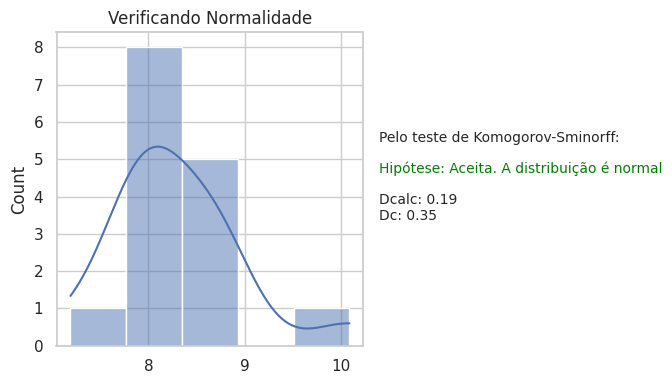

In [262]:
amostra = teste_norm()
amostra.plotagem(cra_s)

In [263]:
#teste z para os cra's
zcalc, regiao = teste_z(media_cra, media, desvio_padrao, tmh_amostra, alpha)

df_resultados

,Média Populacional,Média da Amostra,Zcalc,Região Critíca,Situação,Tipo Teste
0,8,8.294922,1.142227,"(-1.6448536269514729, inf)",H0 é aceita,Unicaudal à Direita


##O problema dos CRA's (2)

Supondo que o laboratório de pesquisa Kadrit Lab está tentando verificar se os CRA's dos alunos que o compõe mantém a mesma média
que foi verificada no último ano. A média calculada no último ano foi 8 (*média populacional* ).

Os pesquisadores ressaltam que desconhecem o valor do desvio padrão entre os CRA's.

Para verificar se a média dos CRA's se mantém, as notas de 50 alunos forão coletadas (*tamanho da amostra* ), admitindo-se um nível de
significância de 5%.

In [264]:
media = 8
tmh_amostra = 50

desvio_padrao = np.random.uniform(0, 1)
cra_s = np.random.normal(loc=media, scale=desvio_padrao, size=tmh_amostra)

#média dos novos cra's
media_cra = np.mean(cra_s)

#significancia
alpha = 0.05

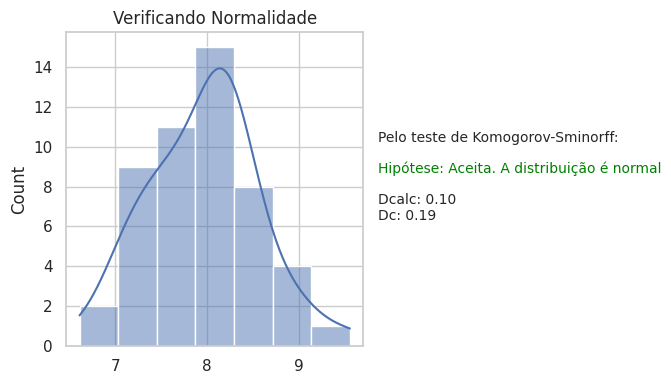

In [265]:
amostra = teste_norm()
amostra.plotagem(cra_s)

In [266]:
#teste z para os cra's
zcalc, regiao = teste_z(media_cra, media, desvio_padrao, tmh_amostra, alpha)

df_resultados

,Média Populacional,Média da Amostra,Zcalc,Região Critíca,Situação,Tipo Teste
0,8,8.294922,1.142227,"(-1.6448536269514729, inf)",H0 é aceita,Unicaudal à Direita
1,8,7.961365,-0.466664,"(-inf, 1.6448536269514722)",H0 é aceita,Unicaudal à Esquerda


####Resultados


$H0~(Hipótese~Nula):~A~média~dos~CRA's~dos~alunos~se~mantém.$

    Isso significa que não há diferença significativa na diferença das médias dos CRA's entre os alunos de 2023 e 2024.


$H1~(Hipótese~Alternativa):~A~média~dos~CRA's~dos~alunos~é~significantemente~diferente.$

    Isso significa que há uma diferença significativa na comparação das médias dos CRA's entre os alunos de 2023 e 2024.

$Bicaudal$

    A média amostral é igual a média populacional.

$Unicaudal~à~Esquerda$

    A média da amostra é menor que a média populacional.

$Unicaudal~à~Direita$

    A média da amostra é maior que a média populacional.


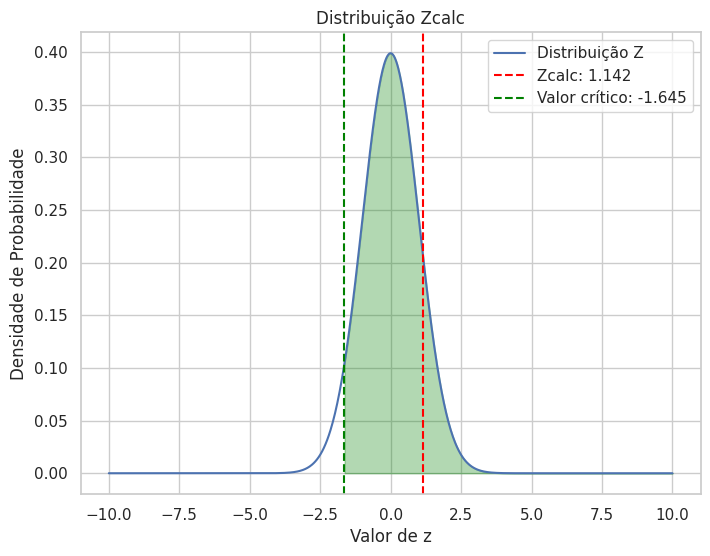

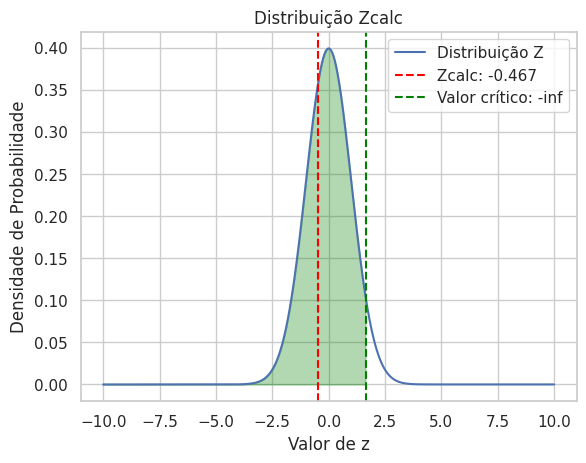

In [283]:
plt.figure(figsize=(8, 6))

for index, row in df_resultados.iterrows():
    media = row['Média Populacional']
    media_amostra = row['Média da Amostra']
    zcalc = row['Zcalc']
    regiao = row['Região Critíca']

    # Gerando a distribuição Z para a linha atual
    x = np.linspace(-10, 10, 1000)
    y = norm.pdf(x)

    # Plotando a distribuição Z
    plt.plot(x, y, label=f'Distribuição Z')
    plt.axvline(zcalc, color='red', linestyle='--', label=f'Zcalc: {zcalc:.3f}')
    plt.axvline(regiao[0], color='green', linestyle='--', label=f'Valor crítico: {regiao[0]:.3f}')
    plt.axvline(regiao[1], color='green', linestyle='--')
    plt.fill_between(x, 0, y, where=(x >= regiao[0]) & (x <= regiao[1]), color='green', alpha=0.3)
    plt.grid(True)
    plt.legend()
    plt.title('Distribuição Zcalc')
    plt.xlabel('Valor de z')
    plt.ylabel('Densidade de Probabilidade')

    plt.show()